# Time Series Data Analysis

Let's revisit the dataset utilized in the tutorial.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io.wavfile
from IPython.display import Audio

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

Import the data and see what's in it (print the first 7 rows):

In [2]:
url = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/multiTimeline.csv"
df = pd.read_csv(url, skiprows=1)
df.head(7)

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43
5,2004-06,64,24,45
6,2004-07,60,23,44


What are your data types and how many rows do you have?

In [8]:
display(len(df))
df.dtypes

168

month      object
diet        int64
gym         int64
finance     int64
dtype: object

Change the DataFrame index to be a `datetime` object. Plot all columns of the dataset:

<Axes: xlabel='month'>

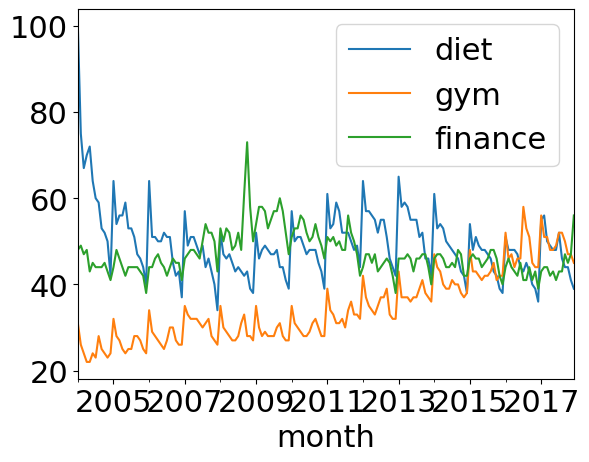

In [12]:
df = df.set_index(pd.to_datetime(df.month)).drop("month", axis=1)
df.plot()

Now let's plot the `gym` and `finance` columns as a time series.

<Axes: xlabel='month'>

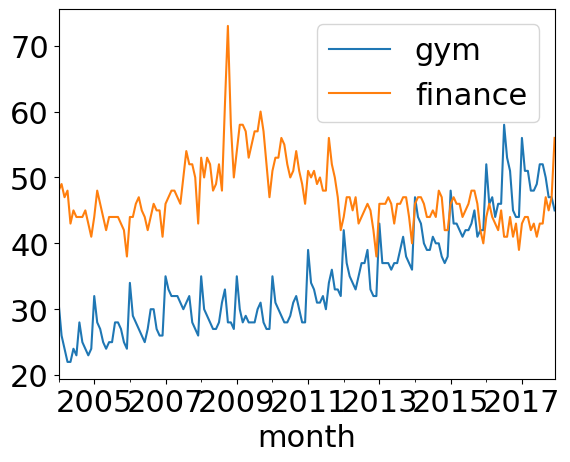

In [14]:
df.loc[:, ["gym", "finance"]].plot()

Using a rolling window of appropriate size and identfy non-seasonal trends in each time series.

<Axes: xlabel='month'>

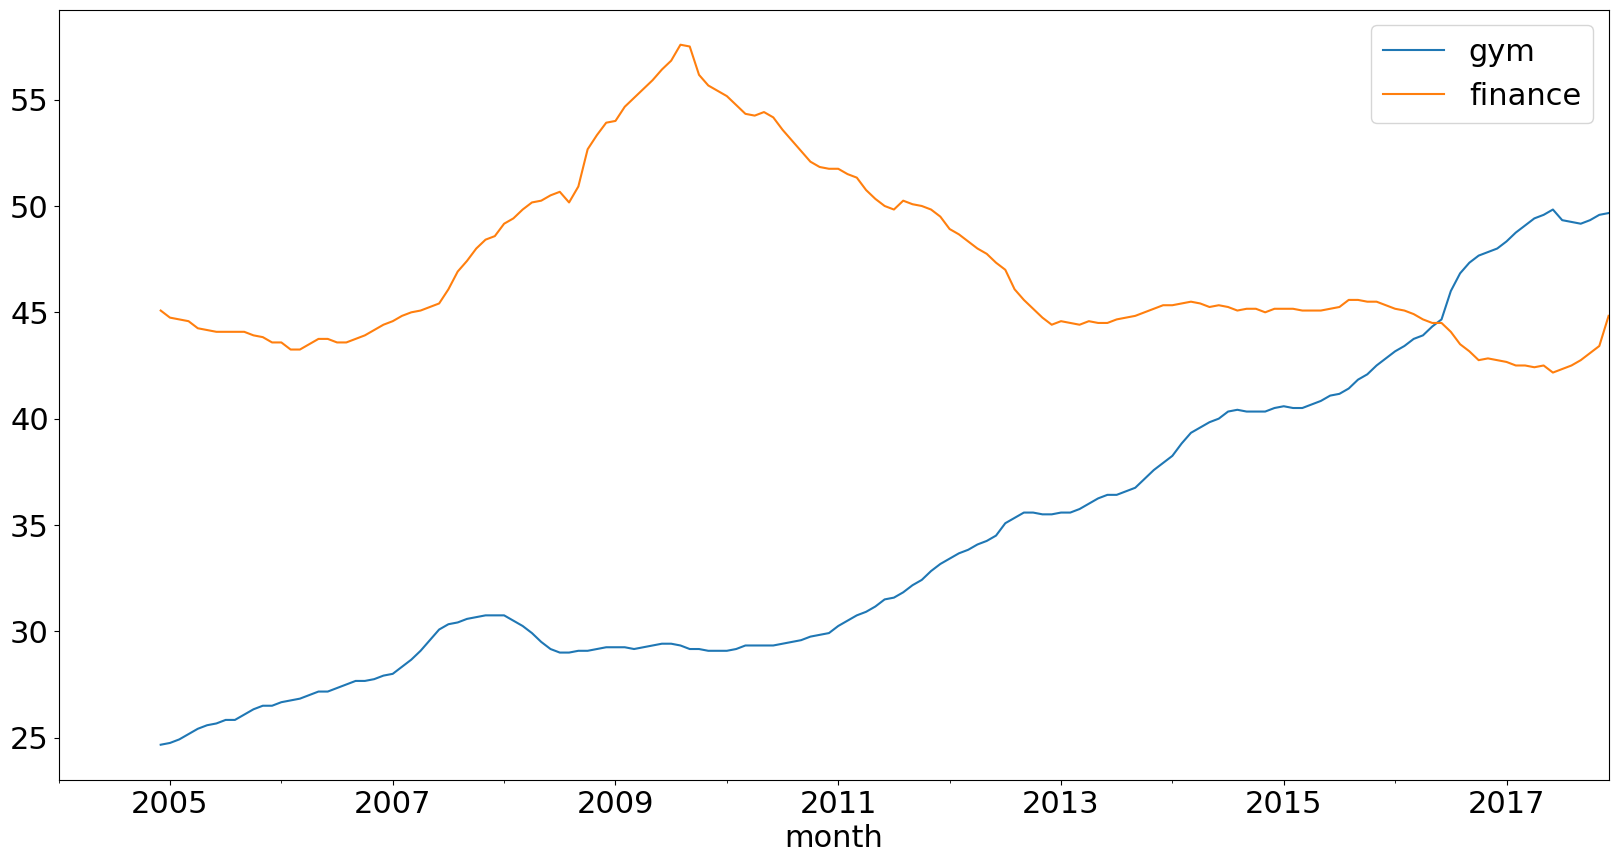

In [16]:
df.loc[:, ["gym", "finance"]].rolling(12).mean().plot(figsize=(20, 10))

Using either first order differencing or the additive model and identify seasonal patterns in the data.

<Axes: xlabel='month'>

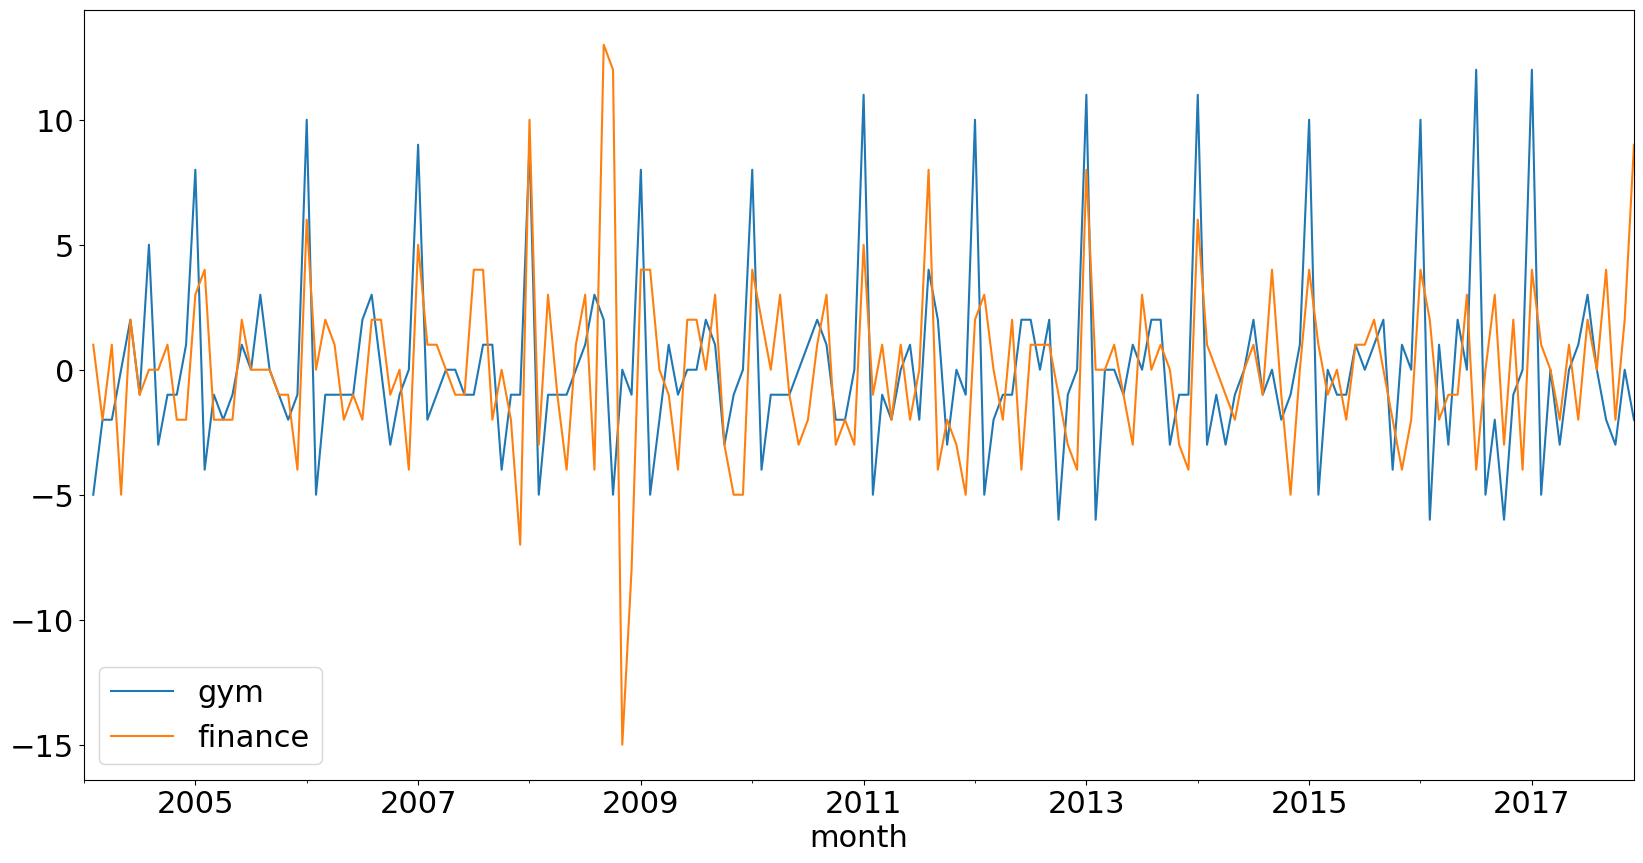

In [17]:
df.loc[:, ["gym", "finance"]].diff().plot(figsize=(20, 10))

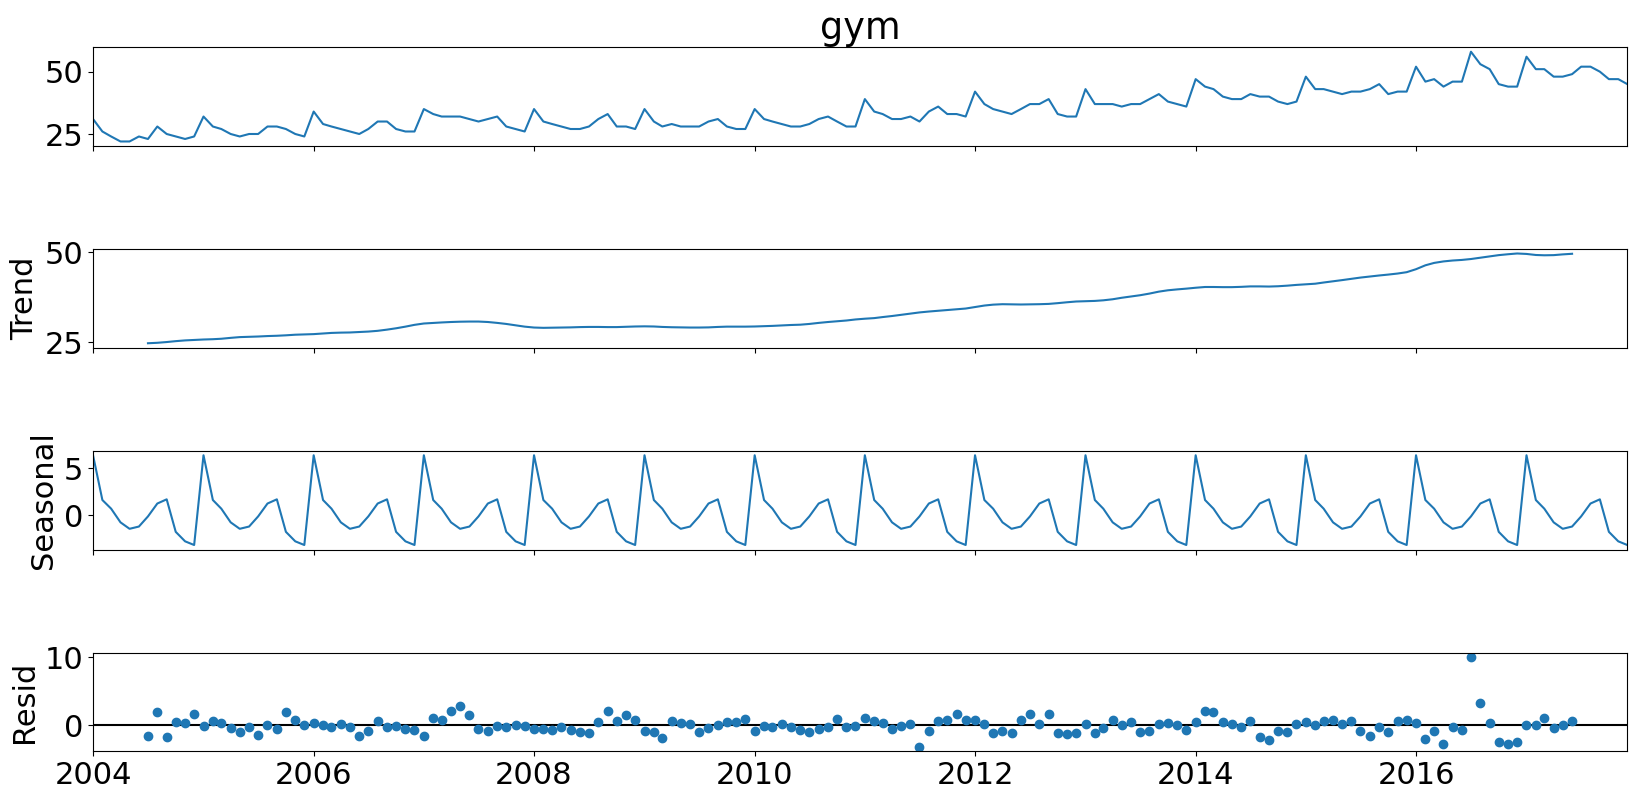

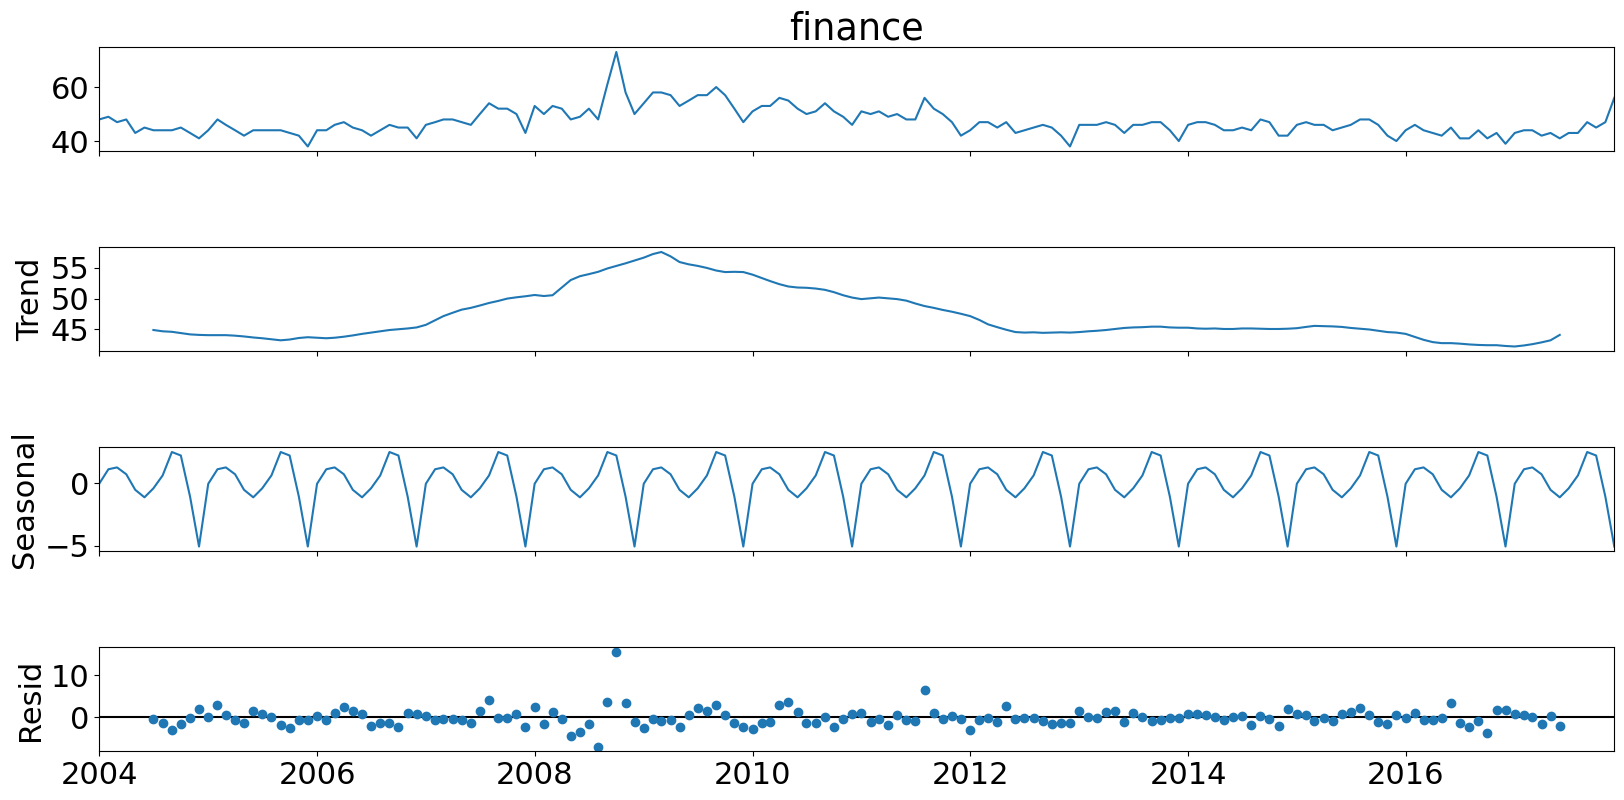

In [21]:
from statsmodels.api import tsa

fig_gym = tsa.seasonal_decompose(df.loc[:, "gym"]).plot()
fig_fin = tsa.seasonal_decompose(df.loc[:, "finance"]).plot()

fig_gym.set_size_inches(20, 10)
fig_fin.set_size_inches(20, 10)

# Representing Signals Data

What is the formula for this sinusoidal wave?

![sinusoid.png](https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Images/sinusoid.png)

Can you reproduce the curve plot? (Use `np.sin`, `np.cos`, and `np.pi`.)

(-6.0, 6.0)

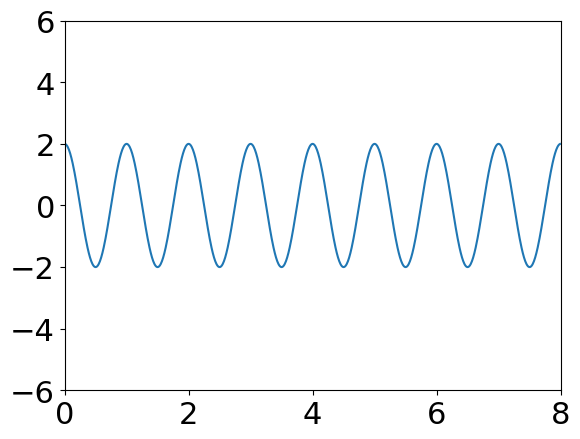

In [26]:
n_sec = 8  # number of seconds to plot
n_points = 100  # number of points per second
t = np.arange(n_sec * n_points) / n_points  # time axis
y = np.cos(t * 2 * np.pi) * 2

plt.plot(t, y)
plt.xlim([0, n_sec])
plt.ylim([-6, 6])

### Approximating a Square Wave

As you've seen, we can create arbitrary signals by combining multiple sinusoid waves.  Let's practice approximating a square wave!

Using Fourier expansion, an **ideal square wave with an amplitude of 1** can be represented as an infinite sum of sinusoidal waves.

> **See the Wikipedia article on the square wave (https://en.wikipedia.org/wiki/Square_wave) for the equation!**

In the code cell below, use the provided formula for the $k$th term in the expansion to calculate 5 and 20 term approximations for the square wave.

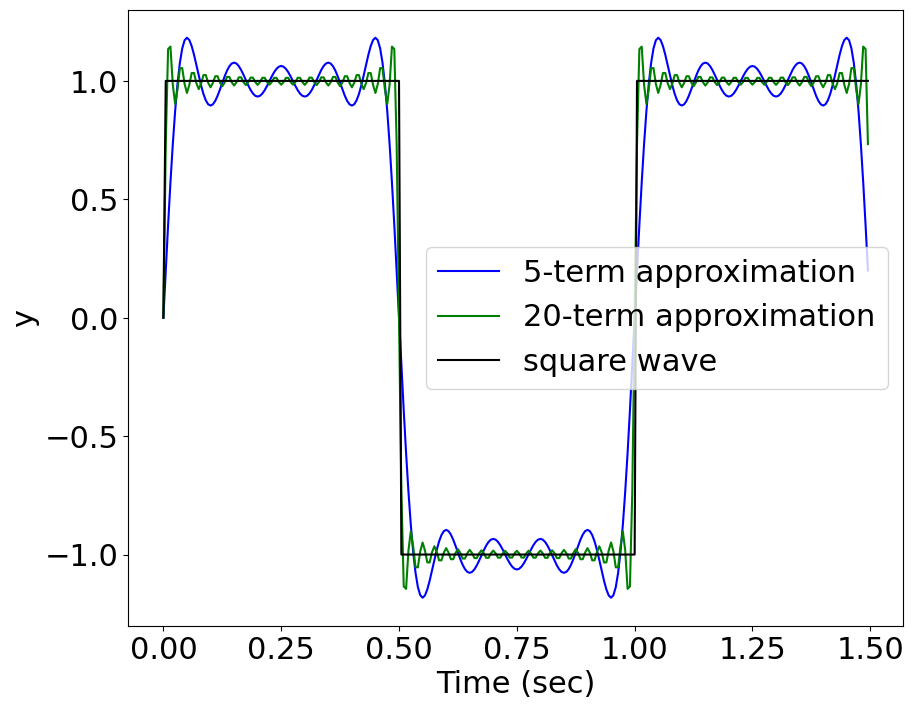

In [40]:
# Setup
n_sec = 1.5  # number of seconds to plot
n_points_per_sec = 200  # number of points per second
t = np.arange(n_sec * n_points_per_sec) / n_points_per_sec  # time vector
f = 1  # define frequency for square wave to be approximated
n_signals = 5  # number of terms for first approximation
n_signals2 = 20  # number of terms for second approximation

# TODO: WHY?

# Populate y_approx1 and y_approx2 with approximations for square wave function
y_approx1 = np.zeros(t.shape)
for k in range(1, 6):
    omega = 2 * np.pi * (2 * k - 1) * f
    y_approx1 += (4 / (np.pi * (2 * k - 1))) * np.sin(omega * t)


y_approx2 = np.zeros(t.shape)
for k in range(1, 20 + 1):
    omega = 2 * np.pi * (2 * k - 1) * f
    y_approx2 += (4 / (np.pi * (2 * k - 1))) * np.sin(omega * t)


# Plotting
sqwave = np.sign(np.sin(2 * np.pi * t))  # an actual square wave (for reference)

plt.figure(figsize=(10, 8))
plt.plot(t, y_approx1, label=f"{n_signals}-term approximation", color="b")
plt.plot(t, y_approx2, label=f"{n_signals2}-term approximation", color="g")
plt.plot(t, sqwave, label="square wave", color="k")

plt.xlabel("Time (sec)")
plt.ylabel("y")
plt.legend()

Those little peaks near the corners are caused by what's known as the [Gibbs Phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon). As long as we have a finite number of terms, no matter how many, we will have Gibbs phenomena.

# Fun with Sounds

Below, we use `scipy` tools to play sounds based on waveforms we define, or to display waveforms based on recorded audio files.

### Beats
If you combine two signals with very similar frequencies, you may induce *beats*.

<img src = "https://github.com/BeaverWorksMedlytics2020/Data_Public/blob/master/Images/Week2/beats.gif?raw=true">



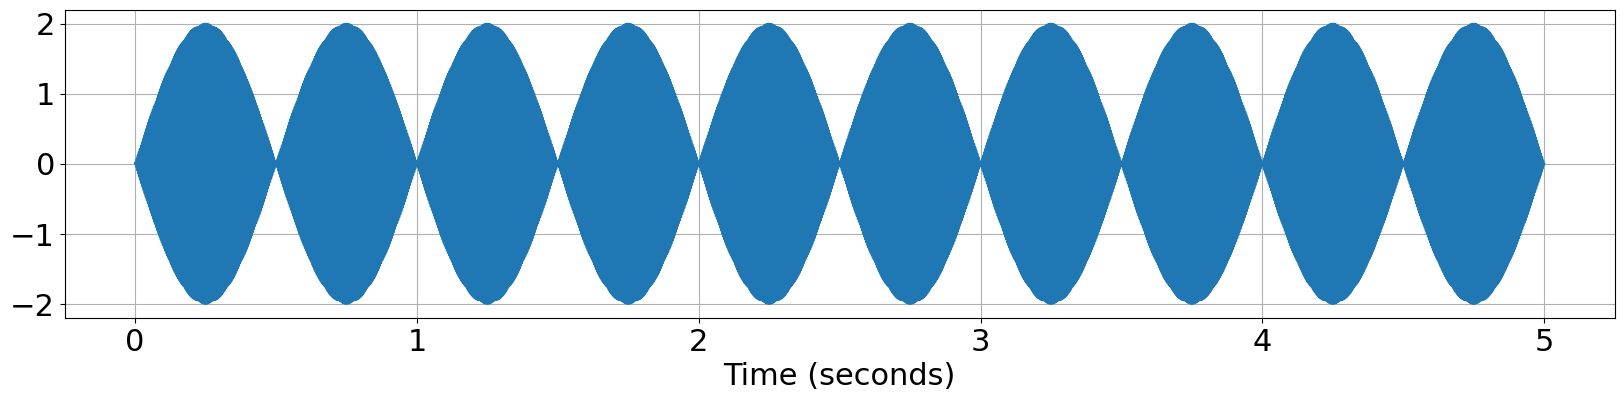

In [45]:
f = 262  # base frequency (Hz)
f_diff = 2  # frequency difference (Hz)

n_sec = 5  # number of seconds
omega1 = 2 * np.pi * f  # angular frequency (rad/sec)
omega2 = 2 * np.pi * (f + f_diff)

n_points = (
    (f + f_diff) * n_sec * 4
)  # number of points; must be greater than (f+f_diff)*n_sec*2
t = np.arange(n_sec * n_points) / n_points
y = np.sin(omega1 * t) + np.sin(omega2 * t + np.pi)

plt.figure(figsize=(20, 4))
plt.plot(t, y)
plt.xlabel("Time (seconds)")
plt.grid(True)
Audio(data=y, rate=n_points)

#### Exercise

Let's play with more sounds.  Here is what "ah" sound looks like:

In [48]:
import urllib.request

# Download the audio files
url1 = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/Sounds/newt.wav"
url2 = "https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/Sounds/vowel_ah.wav"

file1, _ = urllib.request.urlretrieve(url1, filename="newt.wav")
file2, _ = urllib.request.urlretrieve(url2, filename="vowel_ah.wav")

Text(0, 0.5, 'amplitude')

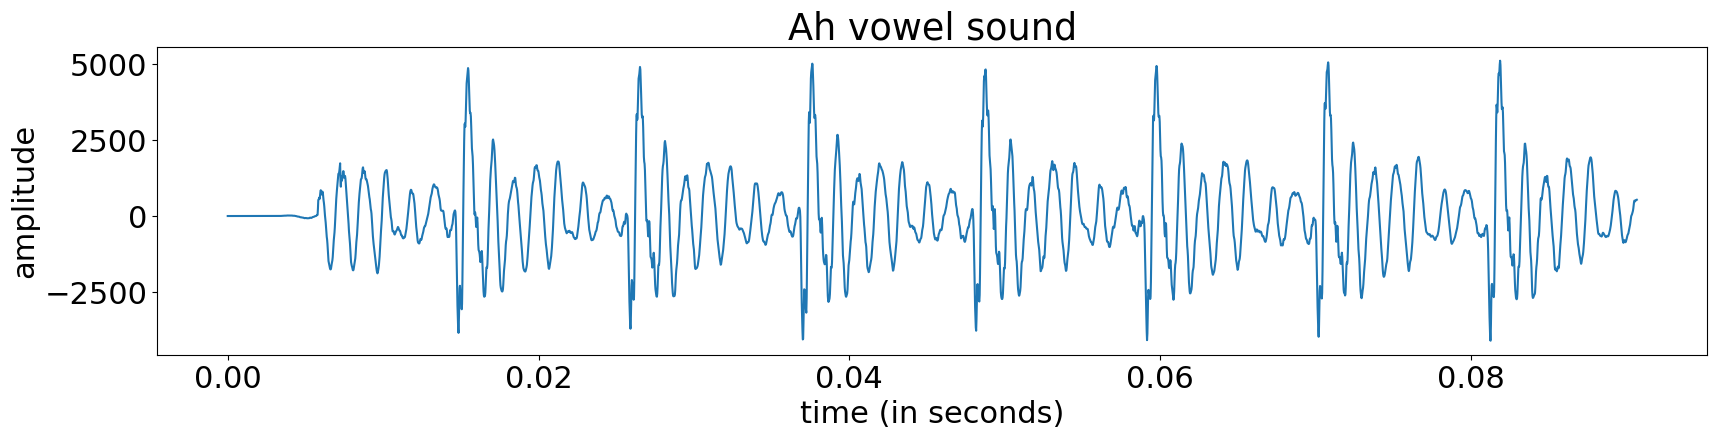

In [49]:
(sample_rate, input_signal) = scipy.io.wavfile.read("./vowel_ah.wav")

t = np.arange(0, len(input_signal) / sample_rate, 1 / sample_rate)

plt.figure(figsize=(20, 4))
plt.plot(t[0:4000], input_signal[0:4000])
plt.title("Ah vowel sound")
plt.xlabel("time (in seconds)")
plt.ylabel("amplitude")

Now let's play the sound!

In [50]:
# For reference, this is what it should sound like
Audio("./vowel_ah.wav")

Your turn! Input the audio file `"./newt.wav"`, plot the figure appropriate to the length of the input signal and sample rate, and play it.

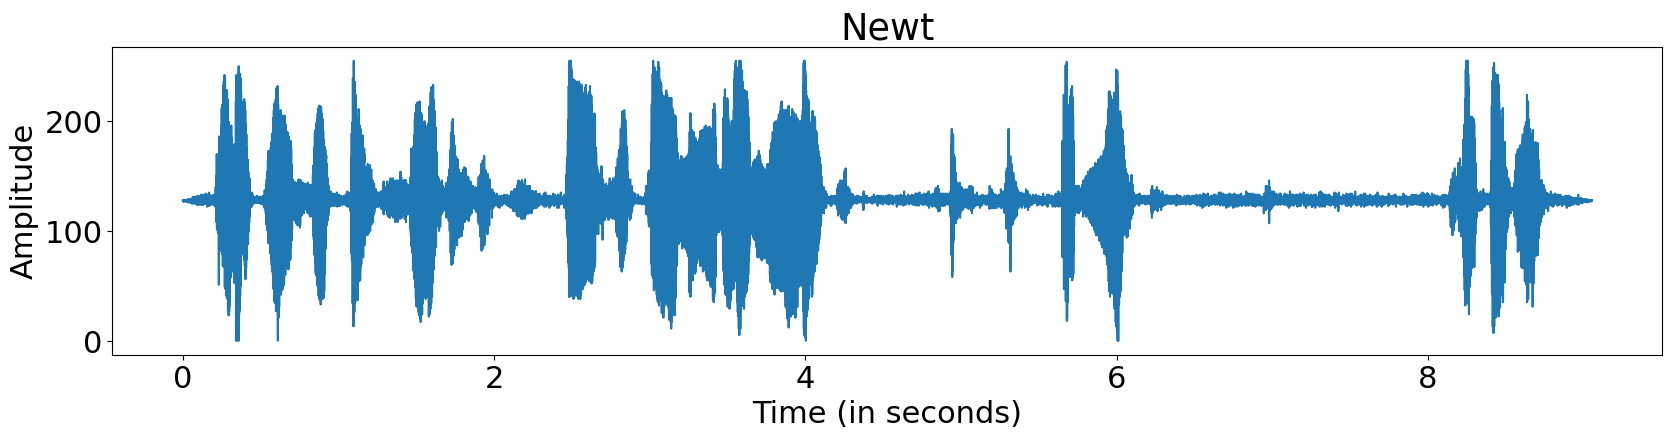

In [51]:
(sample_rate, input_signal) = scipy.io.wavfile.read("./newt.wav")

t = np.arange(0, len(input_signal) / sample_rate, 1 / sample_rate)

plt.figure(figsize=(20, 4))
plt.plot(t, input_signal)
plt.title("Newt")
plt.xlabel("Time (in seconds)")
plt.ylabel("Amplitude")

Audio(data=input_signal, rate=sample_rate)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2703ed7-f8b4-40f5-8dd1-77fe823e4d60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>